In [1]:
%pip install opendatasets  
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install graphviz

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Using cached python_slugify-6.1.2-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73058 sha256=a4afc56f954793593e33e5f332ce427c465ac19433911b4770ba0531671bec19
  Stored in directory: c:\users\nguyen_phan\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=355668d94cab43049c4fdf249b705525059fc7934fe31bc524c4722cc812df81
  Stored in directory: c:\users\nguyen_phan\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart t

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import opendatasets as od
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#  Download dataset
od.download("https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data")

Skipping, found downloaded files in ".\goodreads-books-reviews-290312" (use force=True to force download)


In [4]:
df = pd.read_csv("./goodreads-books-reviews-290312/goodreads_train.csv")
dft = pd.read_csv("./goodreads-books-reviews-290312/goodreads_test.csv")


In [5]:
df[['date_added','date_updated','read_at','started_at']] = df[['date_added','date_updated','read_at','started_at']].apply(pd.to_datetime, format='%a %b %d %H:%M:%S -%f %Y',errors='coerce')
dft[['date_added','date_updated','read_at','started_at']] = dft[['date_added','date_updated','read_at','started_at']].apply(pd.to_datetime,format='%a %b %d %H:%M:%S -%f %Y',errors='coerce')

df ['review_length'] = df['review_text'].str.len()
dft ['review_length'] = dft['review_text'].str.len()



scrap = pd.DataFrame(df.loc[df.rating.apply(int) <= 2,'review_text'].str.split().explode().value_counts())
scrap['text'] = scrap.index
scrap['review_text'].rename('bad_count')
scrap2 = pd.DataFrame(df.loc[df.rating.apply(int) > 2,'review_text'].str.split().explode().value_counts())
scrap2['text'] = scrap.index
scrap2['review_text'].rename('good_count')
scrap = pd.merge(scrap,scrap2,how='outer',on='text')
scrap.to_csv('scrap.csv')

df['book_prefix'] = df['book_id'].astype(str).str.slice(stop=3).apply(int)
dft['book_prefix'] = dft['book_id'].astype(str).str.slice(stop=3).apply(int)

df['book_id_len'] = df['book_id'].astype(str).str.len()
dft['book_id_len'] = dft['book_id'].astype(str).str.len()


In [6]:
df['rating'] = df['rating'].apply(str)
df['book_id'] = df['book_id'].apply(str)

df['read_duration'] = (df['read_at'] - df['started_at']).dt.days.fillna(0)
dft['read_duration'] = (dft['read_at'] - dft['started_at']).dt.days.fillna(0)

df['good_words_count'] = df.review_text.str.count('good|special|best|recommended|great|special|fun|enjoy|beautiful|sweet')
df['bad_words_count'] = df.review_text.str.count('bad|terrible|but|frustrated|worst|quality')

dft['good_words_count'] = dft.review_text.str.count('good|special|best|recommended|great|special|fun|enjoy|beautiful|sweet')
dft['bad_words_count'] = dft.review_text.str.count('bad|terrible|but|frustrated|worst|quality')

df.head()
df.size


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_length,read_duration,good_words_count,bad_words_count
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,2017-07-30 07:44:10.070,2017-08-30 00:00:26.070,2017-08-26 12:05:52.070,2017-08-15 13:23:18.070,28,1,2119,10.0,2,0
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,2016-12-05 10:46:44.080,2017-03-22 11:37:04.070,NaT,NaT,1,0,93,0.0,0,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",2016-11-15 11:29:22.080,2017-03-20 23:40:27.070,2017-03-18 23:22:42.070,2017-03-17 23:45:40.070,22,0,2598,0.0,3,1
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,2016-11-09 17:37:04.080,2016-11-09 17:38:20.080,NaT,NaT,5,1,153,0.0,0,0
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",2016-04-25 09:31:23.070,2016-04-25 09:31:23.070,2016-06-26 00:00:00.070,2016-05-28 00:00:00.070,9,1,4044,29.0,3,3


13500000

In [7]:
print(df.describe())

             n_votes     n_comments  review_length  read_duration  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean        3.294381       1.016656    1064.305393       7.859489   
std        17.873553       5.963821    1251.885950      63.625454   
min        -3.000000      -1.000000       2.000000   -3840.000000   
25%         0.000000       0.000000     219.000000       0.000000   
50%         0.000000       0.000000     604.000000       1.000000   
75%         2.000000       0.000000    1463.000000       4.000000   
max      3222.000000    1335.000000   19826.000000   20033.000000   

       good_words_count  bad_words_count  
count     900000.000000    900000.000000  
mean           1.540009         1.706170  
std            1.975590         2.311112  
min            0.000000         0.000000  
25%            0.000000         0.000000  
50%            1.000000         1.000000  
75%            2.000000         2.000000  
max           50.000000        48.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C70DFC9BE0>,
      dtype=object)

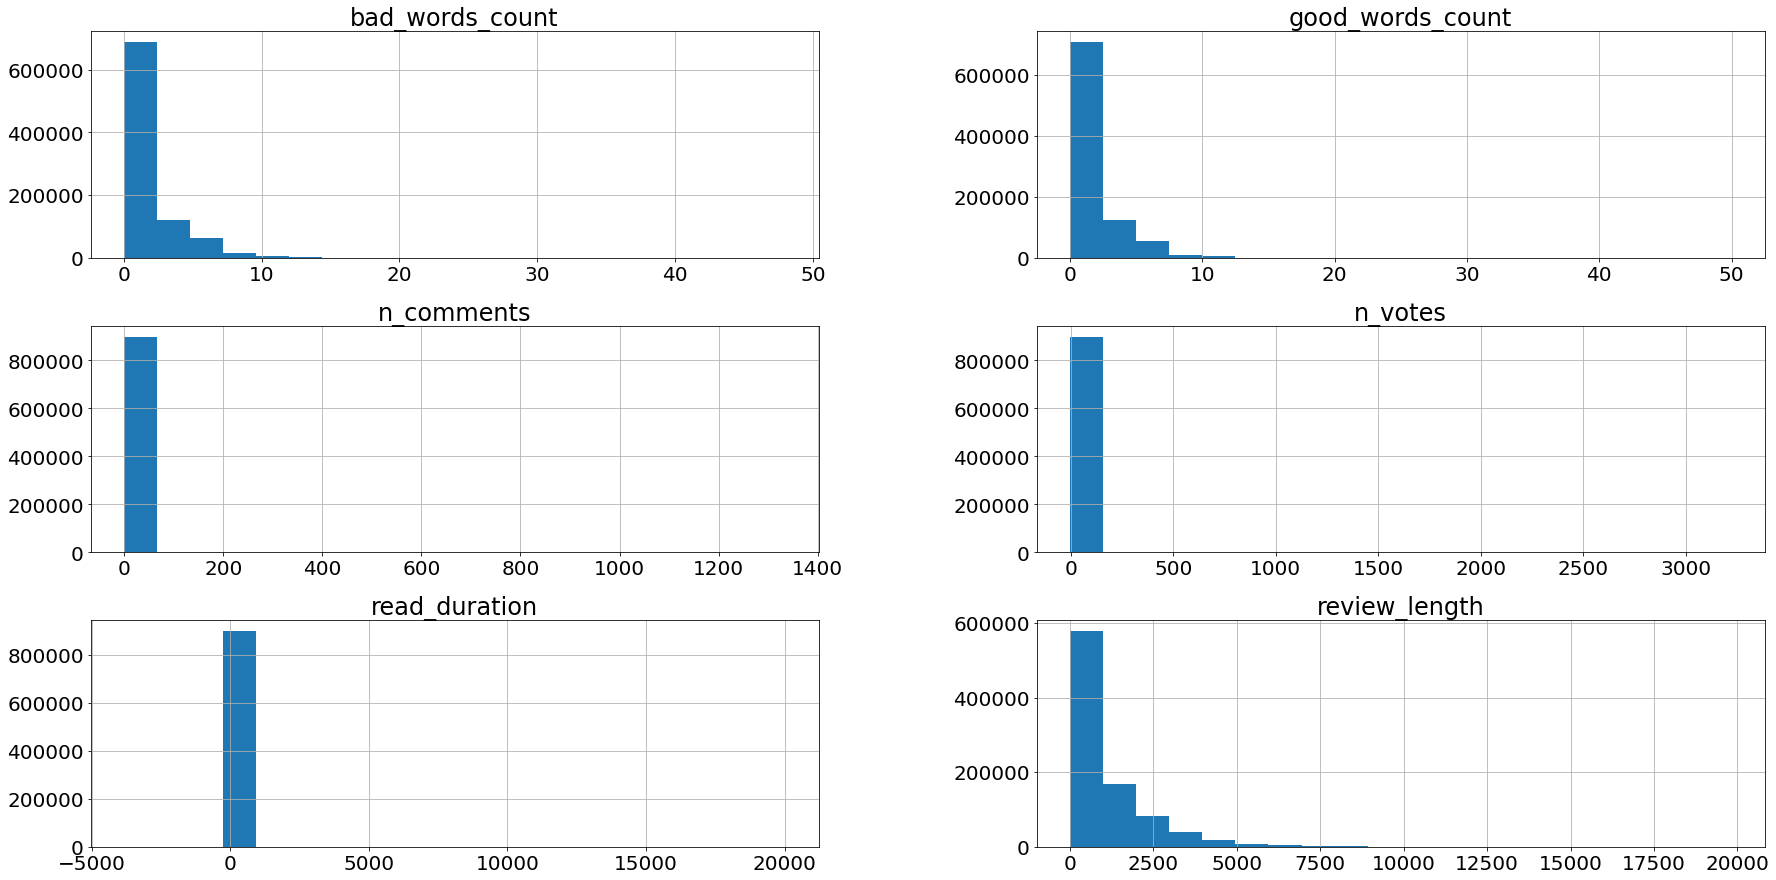

In [8]:
plt.rc('font',size=20)
df.hist(bins=20)
plt.show()

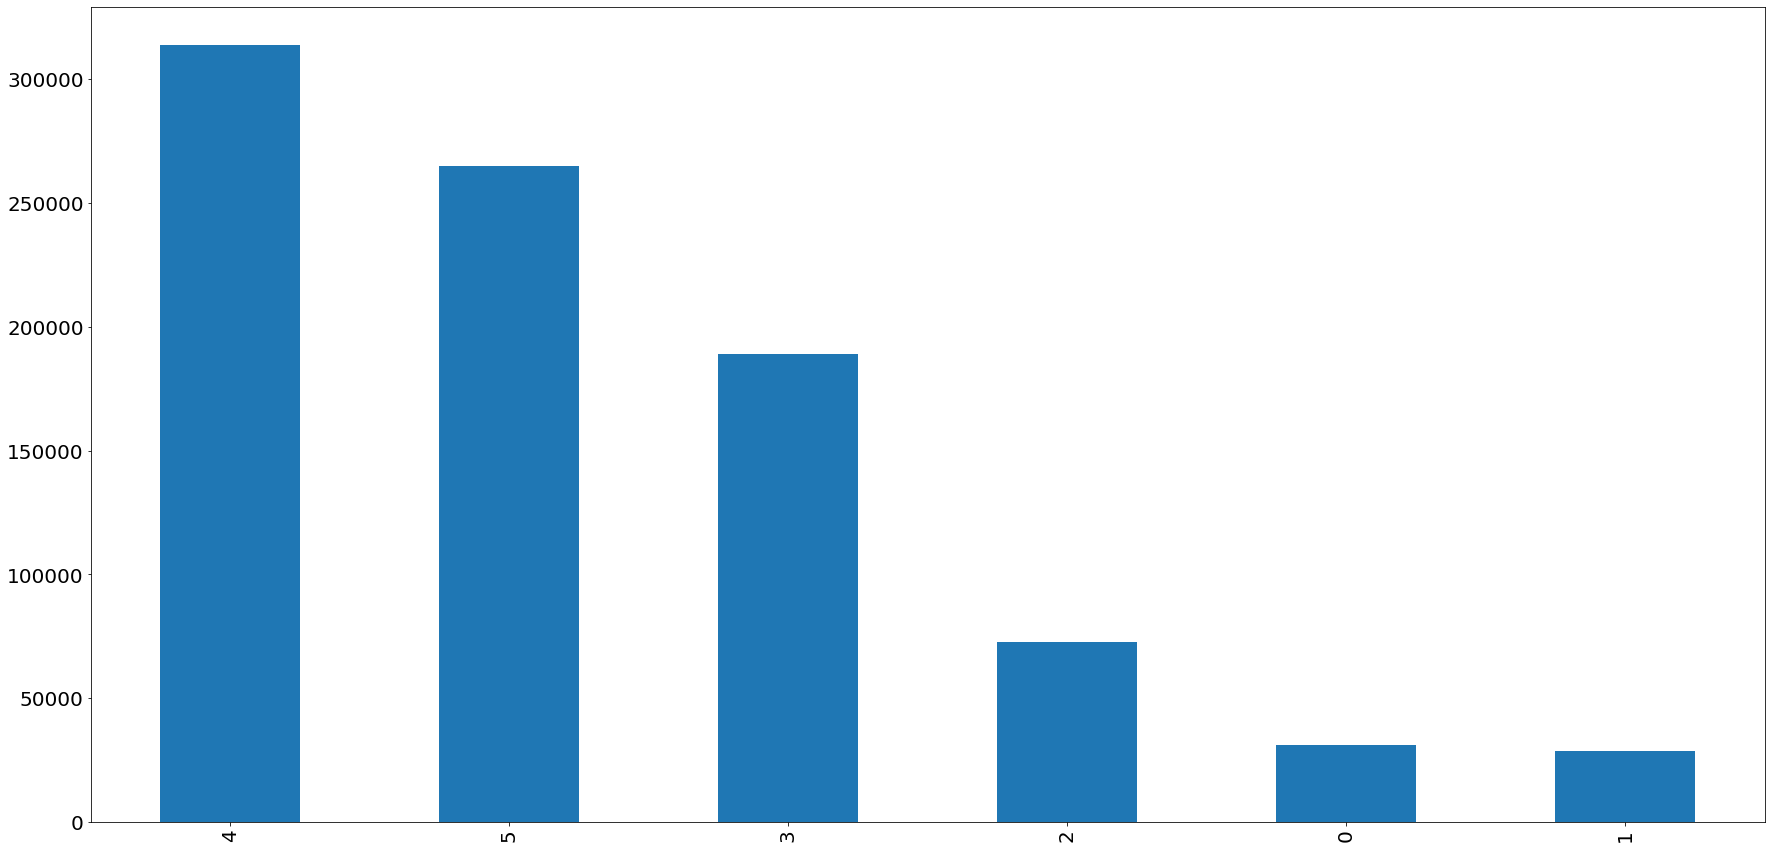

In [9]:
plt.rc('font',size=20)
df['rating'].value_counts().plot(kind='bar')

plt.show()

In [10]:
y_train = df[['rating']]
X_train = df[['n_votes','n_comments','review_length','read_duration']]
y_test = df[['rating']]
X_test = df[['n_votes','n_comments','review_length','read_duration']]

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

pred = regr.predict(X_test).flatten()
dft['rating'] = pd.Series(pred).round().apply(int)
dffinal = dft[['review_id','rating']].to_csv('submission.csv',index=False)



LinearRegression()

In [12]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train.astype(float),X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     651.7
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:38:54   Log-Likelihood:            -1.4784e+06
No. Observations:              900000   AIC:                         2.957e+06
Df Residuals:                  899995   BIC:                         2.957e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6341      0.002   2089.247      0.000       3.631       3.637
n_votes           0.0008   9.48e-05      8.050      0.000       0.001       0.001
n_comments       -0.0041      0.000    -14.276      0.000      -0.005      -0.004
review_length  5.304e-05   1.07e-06     49.550      0.000    5.09e-05    5.51e-05
read_duration  9.564e-05   2.07e-05      4.615      0.000     5.5e-05       0.000
==============================================================================
Omnibus:                   132006.168   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200088.902
Skew:                          -1.072   Prob(JB):                         0.00
Kurtosis:                       3.862   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

dft['rating'] = pd.Series(clf.predict(X_test))
dffinal = dft[['review_id','rating']].to_csv('submission.csv',index=False)



In [18]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
classn = df['rating'].unique().tolist()
featuren = ['n_votes','n_comments','review_length','read_duration']
dot_data =  tree.export_graphviz(clf, out_file=None, 
                                feature_names=featuren,  
                                class_names=classn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 3221225725. [stderr: '']

In [ ]:
classn = df['rating'].unique().tolist()
featuren = ['n_votes','n_comments','review_length','read_duration']
fig = plt.figure(figsize=(100,40))
plottree = tree.plot_tree(clf,fontsize=10,filled=True, class_names=classn,feature_names=featuren)
plottree

NameError: name 'df' is not defined